In [0]:
import tensorflow as tf
import numpy as np

In [0]:
sess = tf.InteractiveSession()

In [0]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]  #Original
#Y, X = np.mgrid[-0.3:0.3:0.001, -1:0.5:0.001] #Use this to zoom into one part
Z = X+1j*Y

In [0]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [0]:
tf.global_variables_initializer().run() #init variables

In [0]:
#Mandelbrot Set
#Compute the new values of z : z^2 + x
zs_ = zs*zs + xs

In [0]:
# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

In [0]:
# Operation to update the zs and the iteration count
# Note: We keep computing zs after they diverge! This
# is very wasteful! There are better, if a little
# less simple, ways to do this.
#
step = tf.group( zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)) )

In [0]:
#run
for i in range(200):
    step.run()

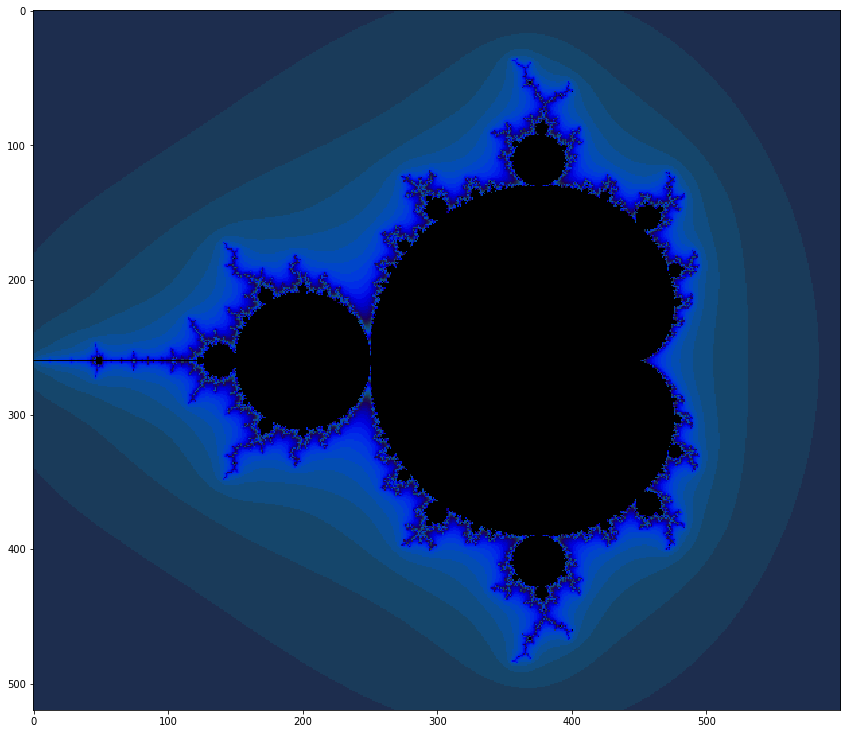

In [10]:
#plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
plt.imshow(processFractal(ns.eval()))
plt.tight_layout(pad=0)
plt.show()    

In [0]:
sess.close()